# Classification on Numerical Data Case Study 01

### Importing basic libraries
##### Pandas and numpy are the basic libraries that will invariably be used in machine learning pipelines, so we import them first

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt

#### Reading data

In [2]:
class_df = pd.read_csv('../../Datasets/Case_Study_01/car.data')
class_df.columns =   ['buying', 'maint', 'doors','persons','lug_boot','safety','target']
class_df.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


#### Required preprocessing because scikit-learn does not support the use of string features, we convert these features to numerical features using label encoder

In [3]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
balance_data = class_df.apply(le.fit_transform)
balance_data

,buying,maint,doors,persons,lug_boot,safety,target
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


#### Splitting the data into test and train set

In [4]:
from sklearn.model_selection import train_test_split

X = balance_data.iloc[:,0:-1]
y = balance_data.iloc[:,6]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train)

      buying  maint  doors  persons  lug_boot  safety
1412       1      0      0        1         2       1
756        0      1      0        0         2       2
589        0      0      1        2         1       0
906        2      3      1        1         0       2
1022       2      0      1        2         0       1
...      ...    ...    ...      ...       ...     ...
1130       2      2      1        2         0       1
1294       2      1      3        2         0       0
860        0      1      3        2         0       1
1459       1      0      2        0         2       0
1126       2      2      1        2         2       0

[1295 rows x 6 columns]


In [5]:
target_labels = ['unacc','acc','good','vgood']

### Method01
# Naive Bayes Classifier

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the **“naive”** assumption of conditional independence between every pair of features given the value of the class variable.

## Gaussian Naive Bayes

**GaussianNB** implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian:

![equations image](../../Images/day04_Capture.PNG)

The parameters ![equations image](../../Images/day04_Capture1.PNG) and ![equations image](../../Images/day04_Capture2.PNG) are estimated using maximum likelihood.

In [6]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train)

In [7]:
preds = gnb.predict(X_test)

#calculating accuracy of predictions made by random forest classifier

mask = preds==y_test
correct = np.count_nonzero(mask)
print (correct*100.0/preds.size)

print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != preds).sum()))

59.72222222222222
Number of mislabeled points out of a total 432 points : 174


##### calculating confusion matrix

In [8]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, preds)
conf_mat

array([[  6,   0,  44,  55],
       [  2,   0,   3,  11],
       [  2,   0, 231,  57],
       [  0,   0,   0,  21]], dtype=int64)

##### Calculating classification report

In [9]:
print(classification_report(y_test, preds, target_names=target_labels))

              precision    recall  f1-score   support

       unacc       0.60      0.06      0.10       105
         acc       0.00      0.00      0.00        16
        good       0.83      0.80      0.81       290
       vgood       0.15      1.00      0.25        21

    accuracy                           0.60       432
   macro avg       0.39      0.46      0.29       432
weighted avg       0.71      0.60      0.58       432



##### Calculating confusion matrix

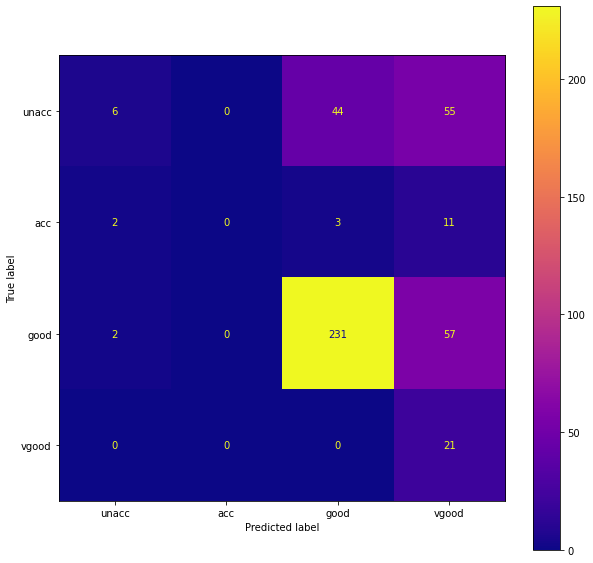

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(gnb, X_test, y_test, cmap='plasma',display_labels=target_labels, ax=ax) 
plt.show()

# Random Forest Classifier

In [11]:
#setting the hyper parameters of random forest classifier
clf = RandomForestClassifier(max_depth=8, random_state=0)

clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, random_state=0)

In [12]:
#checking the values in training labels
y_train

1412    2
756     2
589     0
906     0
1022    2
       ..
1130    2
1294    3
860     2
1459    2
1126    0
Name: target, Length: 1295, dtype: int32

In [13]:
#unique values in train labels
set(y_train)

{0, 1, 2, 3}

##### Predicting using random forest classifier

In [14]:
predicted_labels = clf.predict(X_test)
print("Prediction completed")
# uncomment below lines to get the predicted labesl and the actural labels printed.
print("Comparing predicted and actual labels")
print(predicted_labels[0:10])
y_test[:10]

Prediction completed
Comparing predicted and actual labels
[2 2 2 0 2 0 2 2 2 2]


599     2
932     2
628     2
1497    0
1262    2
930     0
23      2
843     2
963     2
839     2
Name: target, dtype: int32

In [15]:
#calculating accuracy of predictions made by random forest classifier

mask = predicted_labels==y_test
correct = np.count_nonzero(mask)
print (correct*100.0/predicted_labels.size)

print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != predicted_labels).sum()))

94.21296296296296
Number of mislabeled points out of a total 432 points : 25


In [16]:
print(classification_report(y_test, predicted_labels, target_names=target_labels))

              precision    recall  f1-score   support

       unacc       0.87      0.92      0.90       105
         acc       1.00      0.25      0.40        16
        good       0.97      1.00      0.98       290
       vgood       0.85      0.81      0.83        21

    accuracy                           0.94       432
   macro avg       0.92      0.74      0.78       432
weighted avg       0.94      0.94      0.93       432



In [17]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, predicted_labels)
conf_mat

array([[ 97,   0,   8,   0],
       [  9,   4,   0,   3],
       [  1,   0, 289,   0],
       [  4,   0,   0,  17]], dtype=int64)

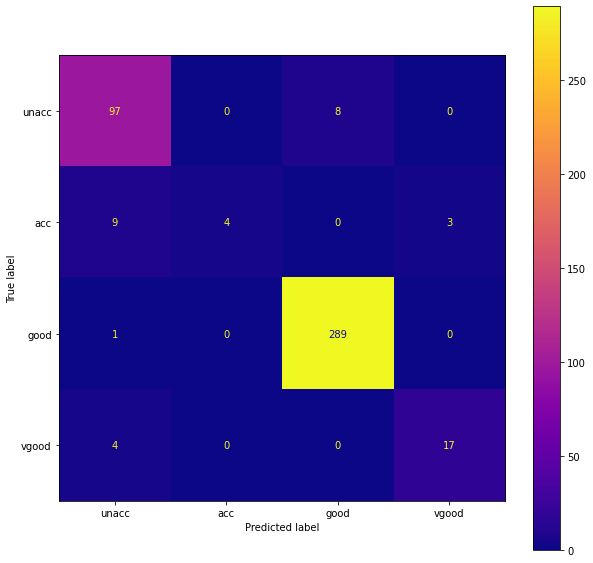

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(clf, X_test, y_test, cmap='plasma',display_labels=target_labels, ax = ax) 
plt.show()

In [19]:
import numpy as np
test = [2,0,2,3,4,2]
test = np.array(test)
test = np.reshape(test, (-1,6))
clf.predict(test)

array([2])